In [155]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import seaborn as sns
import numpy as np
%matplotlib inline
plt.style.use('seaborn')
from datetime import date
df = pd.read_csv('crypto.csv')
d = df[(df['date'] > '2016-06-01') & (df['date'] <= '2018-10-10')]
df1 = d.set_index('date')
lists =['BTC','XRP','XVG','ETH']
coins = df1[df1['symbol'].isin(lists)]
others = df1[df1.symbol!='BTC']

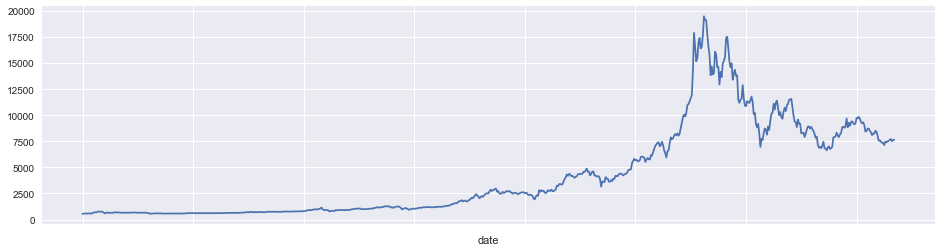

In [151]:
btc['close'].plot(figsize=(16,4))

In [2]:
btc=coins[coins.name=='Bitcoin']
xvg=coins[coins.name=='Verge']
xrp=coins[coins.name=='Ripple']
eth=coins[coins.name=='Ethereum']

In [40]:
market = coins[['name', 'market']]
m1= market.groupby('name').mean()/10**9
m1['share']= m1.market/m1.sum().market
m1.head()

,market,share
name,,
Bitcoin,70.447191,0.643974
Ethereum,26.514048,0.242371
Ripple,12.149507,0.111061
Verge,0.283686,0.002593


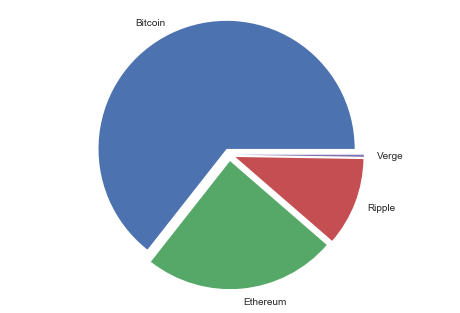

In [186]:
labels=['Bitcoin', 'Ethereum', 'Ripple','Verge']
explode=[0.05,0.05,0.05,0.05]
plt.pie(m1.share, labels=labels,explode=explode)
plt.axis('equal')
plt.show()

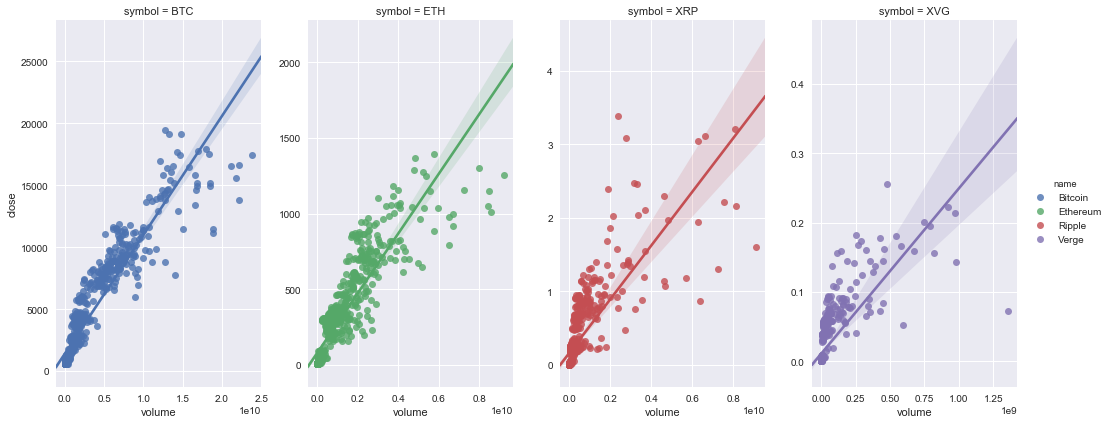

In [98]:
g=sns.lmplot('volume','close', coins, hue='name', col='symbol',sharex=False,sharey=False, height=6, aspect=.6)

In [6]:
coins_close = coins[['name','close']].pivot(columns='name')
coins_rets = coins_close['close'].pct_change()

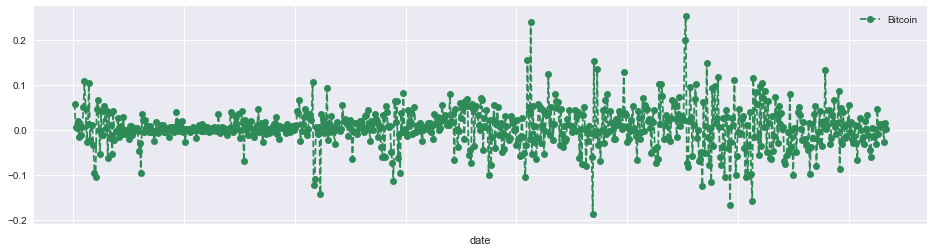

In [31]:
coins_rets['Bitcoin'].plot(figsize=(16,4), legend=True,linestyle='--', marker='o', color='seagreen')

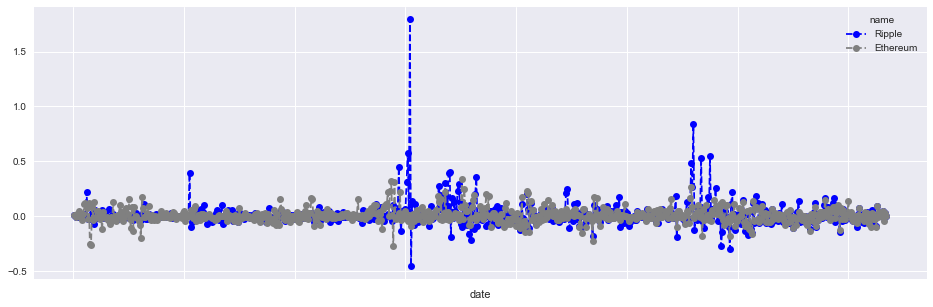

In [181]:
coins_rets[['Ripple','Ethereum']].plot(figsize=(16,5), linestyle='--', marker='o', color=['blue','grey'])

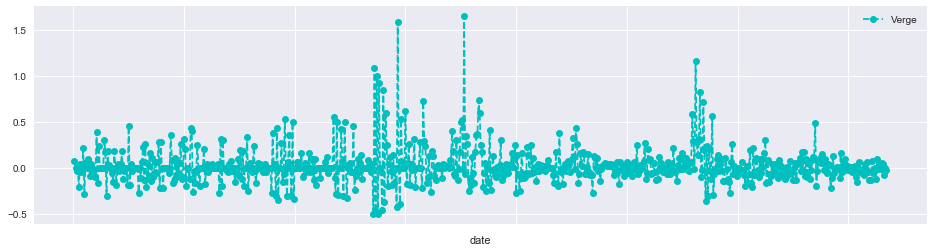

In [94]:
coins_rets['Verge'].plot(figsize=(16,4), legend=True,linestyle='--', marker='o', color='c')

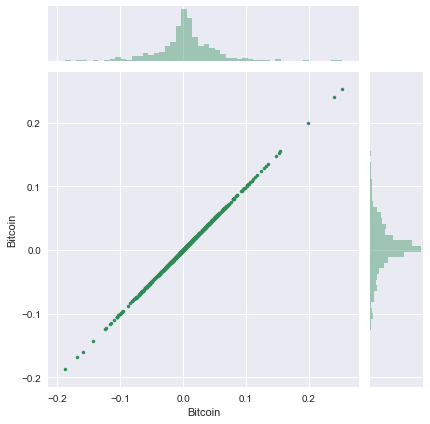

In [9]:
sns.jointplot('Bitcoin','Bitcoin', coins_rets, kind='scatter', color='seagreen',s=10)

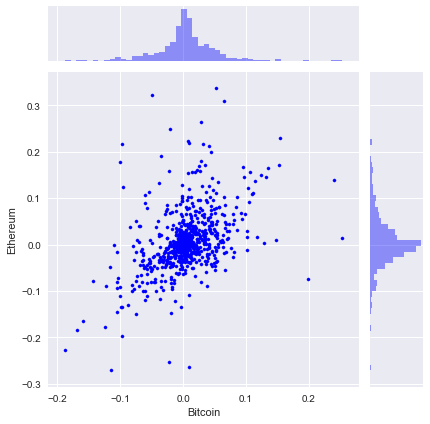

In [105]:
sns.jointplot('Bitcoin','Ethereum', coins_rets, kind='scatter', color='blue',s=10)

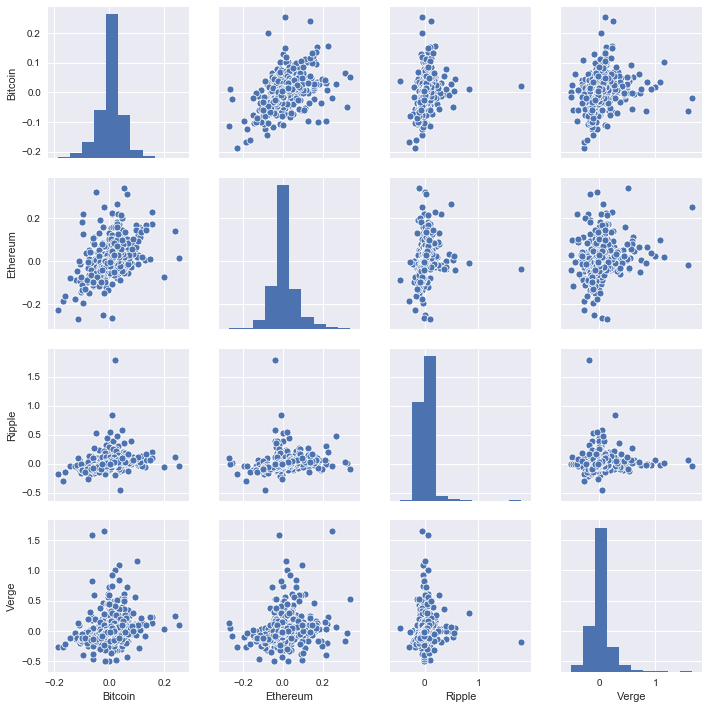

In [104]:
sns.pairplot(coins_rets.dropna())

In [164]:
other = others[['name', 'market']]
m2= other.groupby('name').mean()/10**9
m2['share']= m2.market/m2.sum().market
m2.head()

,market,share
name,,
0x,0.375263,0.002772
0xBitcoin,0.000000,0.000000
1World,0.003811,0.000028
2GIVE,0.002351,0.000017
300 Token,0.000144,0.000001
